# KEGGutils Tutorial 1 : Enzymatic Correlation Graphs
## ...using just KEGGutils basic functions
***

### First things first
Let's import `KEGGutils` and `networkx`, on which `KEGGutils` is based, with aliases ( with maybe some module path scope adjusting first )

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import KEGGutils as kg
import networkx as nx

check that the latest version of `KEGGutils` is installed

In [3]:
kg.__version__

'0.2.0'

and we're ready to start our tutorial

let's remove the cached files to use the freshest available data

In [4]:
kg.delete_cached_files()

> deleting the following files from C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\C00002-image.gif
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\compound-C7H10O5-formula
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\D00564-ddi
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\ece-info
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\eco-ncbi-geneid-conv
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\ecs-ECs1206-aaseq
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\ecs-ECs1206-description
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\enzyme-hsa-link
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\enzyme-info
C:\Users\filippo.cast

### The interesting stuff

let's download the disease list from KEGG:

In [5]:
kegg_diseases = kg.keggapi_list("disease")

In [6]:
kegg_diseases[:10] 

['ds:H00001',
 'ds:H00002',
 'ds:H00003',
 'ds:H00004',
 'ds:H00005',
 'ds:H00006',
 'ds:H00007',
 'ds:H00008',
 'ds:H00009',
 'ds:H00010']

we can obtain some description on the `ds:H00773` disease or really any kind of KEGG entry using `get_infos()`

In [7]:
print(kg.get_infos.__doc__)

 Prints KEGG infos for a given database item 
    Parameters:
        :item (str): KEGG item you want infos about
        :verbose (Bool), False: if True get full KEGG description, if False get only first 4 lines
        


In [8]:
kg.get_infos("ds:H00773", verbose = False)

Infos on ds:H00773 from KEGG:

NAME        Autosomal dominant mental retardation
DESCRIPTION Mental retardation (MR) is a neurodevelopmental disorder characterized by low intelligence quotient (IQ) and deficits in adaptive behaviors. Most MR genes identified so far were either located on the X chromosome or are associated with an autosomal recessive mode of inheritance. Recently, a lot of genes associated with autosomal dominant mental retardation have been identified.
CATEGORY    Mental and behavioural disorder


enabling the `verbose` option will show the full description.

let's try to download the bipartite graph linking each disease to a set of genes by using `kegg_graph()`, you must specify the source and the target categories: note that human genes are referred with the `hsa` key.

You can use the `force_download` option to download the file again overwriting previous copies that you may have already downloaded

In [9]:
print(kg.kegg_link_graph.__doc__)

Returns a NetworkX bipartite link graph with nodes from source and target KEGG databases 
    
    Parameters
    ----------
    source : str
        source database
    target : str
        target database
    force_download : bool, optional
        if set to True overwrites pre-existing database file with the same name (the default is False, which [default_description])
    
    Returns
    -------
    graph
        bipartite link graph
    


In [10]:
dis_gene = kg.kegg_link_graph("disease", "hsa", force_download = False)

All `KEGGutils` graph nodes have a `nodetype` attribute which helps us differentiate between different objects in a graph:

In [11]:
nx.get_node_attributes(dis_gene, "nodetype")['ds:H00773']

'disease'

the list of nodes that are linked to a particular given node can be obtained the same way as with every `networkx` graph

In [12]:
dis_gene['ds:H00773']

AtlasView({'hsa:55777': {}, 'hsa:81704': {}, 'hsa:1013': {}, 'hsa:84623': {}, 'hsa:8831': {}, 'hsa:2904': {}, 'hsa:1859': {}, 'hsa:2902': {}, 'hsa:547': {}, 'hsa:10369': {}, 'hsa:2036': {}, 'hsa:57492': {}, 'hsa:1778': {}, 'hsa:8289': {}, 'hsa:6598': {}, 'hsa:6597': {}, 'hsa:55690': {}, 'hsa:57459': {}, 'hsa:1499': {}, 'hsa:4208': {}, 'hsa:10664': {}, 'hsa:10472': {}, 'hsa:55209': {}, 'hsa:10522': {}, 'hsa:27245': {}, 'hsa:26053': {}, 'hsa:6664': {}, 'hsa:26040': {}, 'hsa:10771': {}, 'hsa:5813': {}, 'hsa:7994': {}, 'hsa:1804': {}, 'hsa:10087': {}, 'hsa:5528': {}, 'hsa:5518': {}, 'hsa:1917': {}, 'hsa:23040': {}, 'hsa:283489': {}, 'hsa:2782': {}, 'hsa:3097': {}, 'hsa:7204': {}, 'hsa:23152': {}, 'hsa:56479': {}, 'hsa:10274': {}, 'hsa:5879': {}, 'hsa:9320': {}, 'hsa:80155': {}, 'hsa:51111': {}, 'hsa:55870': {}, 'hsa:815': {}, 'hsa:816': {}, 'hsa:9853': {}})

or using `kg.linked_nodes`, which returns the list of connected nodes, or optionally a dictionary with each node and its `nodetype`

In [13]:
print(kg.linked_nodes.__doc__)

Linked Nodes:
        Returns all nodes in graph linked to node
        
    
    Parameters
    ----------
    graph : Graph
        input graph, has to be generated via kegg_link_graph()
    node : str
        name of a node in graph
    return_dict : bool
        if True returns a dict {nodes: nodetypes}
        
    Returns
    -------
    linked_nodes (dict)
         dict of linked nodes { node: nodetype}
    linked_nodes (list)
        list of linked nodes

    .. seealso:: kegg_link_graph()
        


In [14]:
ds_genes = kg.linked_nodes(dis_gene, 'ds:H00773', return_dict = True)
ds_genes_list = kg.linked_nodes(dis_gene, 'ds:H00773', return_dict = False)

in this case we obviously expect all the linked node to be human genes marked with `hsa`

In [15]:
ds_genes_list[:10]

['hsa:55777',
 'hsa:81704',
 'hsa:1013',
 'hsa:84623',
 'hsa:8831',
 'hsa:2904',
 'hsa:1859',
 'hsa:2902',
 'hsa:547',
 'hsa:10369']

we can find every enzyme associated with each of these genes using the gene-enzyme database from **KEGG**, which we download the same way as the previous one

In [16]:
gene_enzyme = kg.kegg_link_graph("hsa", "enzyme")

it's possible to use the gene list we obtained before to narrow down a search on the complete KEGG *gene-enzyme* database with `kg.neighbor_graph()`: 

In [17]:
print(kg.neighbor_graph.__doc__)

Neighbor Subgraph
    
    Given a Graph and a node list returns the subgraph generated with the nodes
    in the node dict, the first neighbors of those nodes, and the edges between
    them
    
    
    Parameters:
        :kegg_graph (Graph): input graph, has to be generated via kegg_link_graph()
        :node_dict (dict): dict of input nodes
        :name (str): optional, name of the graph
        
    Returns:
        :neighbor_graph (Graph): graph of node_dict, first neighbors of those nodes        and edges between them
    .. seealso:: kegg_link_graph()
    


In [18]:
ds_gene_enzyme = kg.neighbor_graph(gene_enzyme,
                                   ds_genes,
                                   keep_isolated_nodes = True,
                                   name = "ds_gene_enzyme")

the function returns a subgraph of `gene_enzyme` selecting both `ds_genes` nodes and their neighbors in the original graph.

Not all `ds_genes` are actually present in `gene_enzyme`, we can represent them as isolated nodes in the new graph using the `keep_isolated_nodes` option

Graphic functionality is provided by `kg.draw()`

In [19]:
print(kg.draw.__doc__)

Graph drawing made a bit easier
    
    Parameters:
        :graph (Graph): input graph, has to be generated via kegg_link_graph()
        :layout (str): layout type, choose from 'bipartite_layout',        'circular_layout','kamada_kawai_layout','random_layout',\ 'shell_layout',        'spring_layout','spectral_layout'
        :filename (str): if a filename is selected saves the plot as filename.png
        :title (str): title for the graph
        :return_ax: if True returns ax for plot
        
    Returns:
        :ax (list): optional ax for the plot


        


C:\Users\filippo.castelli4\AppData\Local\Continuum\anaconda3\envs\KEGGenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


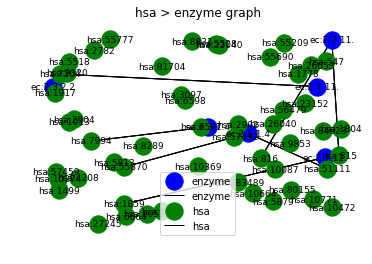

In [20]:
kg.draw(ds_gene_enzyme, layout = "random_layout")

we see that the actual common enzymes between those obtained from `dis_gen` and those we found on `gene_enzyme` are very few

In [21]:
set(ds_genes.keys()) & set(gene_enzyme.nodes)

{'hsa:1859',
 'hsa:51111',
 'hsa:55870',
 'hsa:7204',
 'hsa:7994',
 'hsa:815',
 'hsa:816',
 'hsa:9320'}

Le'ts download the *enzyme-reaction* graph from **KEGG** for a last step

In [22]:
enzyme_reaction = kg.kegg_link_graph("enzyme", "reaction")

using the same mechanism as before we get the *enzyme-reaction* graph

we can get every node of a particular `nodetype` in a graph using `kg.get_nodes_by_nodetype`:

In [23]:
print(kg.get_nodes_by_nodetype.__doc__)

Given a KEGG graph returns all the nodes for a given nodetype
    
    Parameters
    ----------
    graph : Graph
        input graph, has to be generated via kegg_link_graph()
    nodetype : str
        nodetype, is generally a <database> KEGG name
    return_dict : bool
        if True returns a {node : nodetype dict}
        
    Returns
    -------
    nodes : list
        nodes corresponding to nodetype
    nodedict : dict
        {nodes: nodetypes}

    Example
    .......
    >>> KEGG_graph = kegg_link_graph("hsa", "disease")
    >>> nodedict = get_nodes_by_nodetype(KEGG_graph, "hsa")
    >>> list(nodedict.items())[:5]
    [('hsa:7428', 'hsa'),
     ('hsa:4233', 'hsa'),
     ('hsa:2271', 'hsa'),
     ('hsa:201163', 'hsa'),
     ('hsa:7030', 'hsa')]

    Seealso
    -------
    kegg_link_graph()
        


In [24]:
ds_enzymes = kg.get_nodes_by_nodetype(ds_gene_enzyme, "enzyme", return_dict = True)

In [25]:
list(ds_enzymes.keys())

['ec:2.3.2.26',
 'ec:2.7.11.1',
 'ec:2.1.1.43',
 'ec:2.3.1.48',
 'ec:2.7.11.17',
 'ec:2.7.12.1']

the same `neighbor_graph()` function as before is used to calculated a subgraph of `enzyme_reaction`

In [26]:
ds_enzyme_reaction = kg.neighbor_graph(enzyme_reaction,
                                       ds_enzymes,
                                       keep_isolated_nodes = True,
                                       name = "ds_enzyme_reaction" )

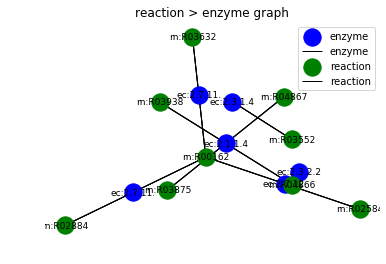

In [27]:
kg.draw(ds_enzyme_reaction, layout = "kamada_kawai_layout")

we can count all the reactions in the graph

In [28]:
ds_reactions = kg.get_nodes_by_nodetype(ds_enzyme_reaction, "reaction", return_dict = True)
list(ds_reactions.keys())

['rn:R03552',
 'rn:R04867',
 'rn:R02884',
 'rn:R03938',
 'rn:R02584',
 'rn:R03632',
 'rn:R03875',
 'rn:R00162',
 'rn:R04866']

we want now to create a projected graph in which we link two enzymes if they appear in the same reaction: we can use the `projected_graph()`function that does exactly that

In [29]:
print(kg.projected_graph.__doc__)

Calculates the projected graph respect to a node list     
    Parameters:
        :kegg_graph (Graph): input graph, has to be generated via kegg_link_graph()
        :nodedict (dict): dict of nodes and nodetypes
        :multigraph (bool): if True 
        :name (str): optional name of the graph
        
    Returns:
        :projected_graph (Graph): projected graph
    .. seealso:: kegg_link_graph()
    


here we want to project the graph on the enzymes set that we obtain from `ds_gene_enzyme` using `get_nodetype_nodes()`

In [30]:
ds_enzymes = kg.get_nodes_by_nodetype(ds_gene_enzyme, "enzyme", return_dict = True)

In [31]:
list(ds_enzymes.keys())

['ec:2.3.2.26',
 'ec:2.7.11.1',
 'ec:2.1.1.43',
 'ec:2.3.1.48',
 'ec:2.7.11.17',
 'ec:2.7.12.1']

now we can finally project `ds_enzyme_reaction` onto the `ds_enzymes` set to get our enzyme correlation graph

In [32]:
ds_enzyme_enzyme = kg.projected_graph(ds_enzyme_reaction, ds_enzymes, name = "ds_enzyme_enzyme")

In [33]:
ds_enzyme_reaction.edges

EdgeView([('rn:R03552', 'ec:2.3.1.48'), ('ec:2.7.11.1', 'rn:R03632'), ('ec:2.7.11.1', 'rn:R00162'), ('rn:R04867', 'ec:2.1.1.43'), ('ec:2.1.1.43', 'rn:R03875'), ('ec:2.1.1.43', 'rn:R04866'), ('ec:2.1.1.43', 'rn:R03938'), ('rn:R02884', 'ec:2.7.11.17'), ('rn:R02584', 'ec:2.7.12.1'), ('ec:2.7.11.17', 'rn:R00162'), ('rn:R00162', 'ec:2.7.12.1')])

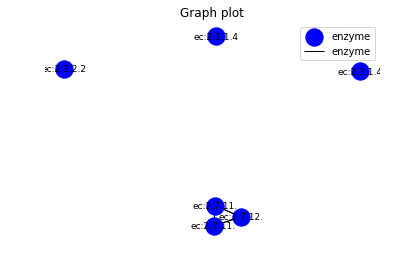

In [34]:
kg.draw(ds_enzyme_enzyme)